In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [40]:
class MyRandom():
    
    def __init__(self,seed=15,method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no existente')
            
    def GetNumber(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def Random(self, size=None):
        
        if size == None:
            return self.GetNumber()
        else:
            
            sample = np.zeros(size)
            for i in range(size):
                sample[i] = self.GetNumber()
                
            return sample
        
    def GetMoment(self,k=1,N=int(1e3)):
        
        sample = self.Random(N)
        
        Moment = np.sqrt(N)*( np.abs( np.mean(sample**k) - 1/(1+k) ) )
        
        return Moment

In [41]:
rand1 = MyRandom(seed=150)
rand2 = MyRandom(seed=50,method='drand48')

In [42]:
#for i in range(10):
#    print(rand1.GetNumber(),rand2.GetNumber())

In [43]:
#rand1.Random(10)

In [44]:
#np.random.uniform(-1,1,size=(3,4))

In [45]:
N = 5000
sample1 = rand1.Random(N)
sample2 = rand2.Random(N)

In [46]:
indices =np.arange(N)
Even = (indices%2) == 0
Even

array([ True, False,  True, ..., False,  True, False])

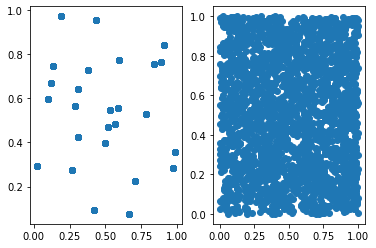

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(sample1[Even],sample1[~Even])
ax2.scatter(sample2[Even],sample2[~Even])

In [54]:
rand1.GetMoment(k=30,N=int(1e5))

1.3995656408501838

In [55]:
Np = 5
Points = np.logspace(2,6,Np)
Points

array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])